# Task 2: Customer Segmentation Using Unsupervised Learning

## Problem Statement
Segment mall customers into meaningful groups based on their spending habits so that marketing can target each segment with tailored strategies.

Type: Unsupervised Learning (Clustering)  
Goal: Discover natural groupings of customers and describe them with actionable business strategies.

## Objectives
- Conduct Exploratory Data Analysis (EDA)
- Apply K-Means clustering
- Use PCA and t-SNE for 2D visualization of clusters
- Profile each cluster and propose marketing strategies


In [1]:
# Code: Imports and basic configuration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

## Dataset

In [4]:
# Code: Load dataset
csv_path = "Mall_Customers.csv"  # update path if needed
df = pd.read_csv(csv_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Quick Data Overview
- Check shape, data types, missing values, and basic statistics.

In [5]:
# Code: Overview
print("Shape:", df.shape)
print("\n\nInfo():")
print(df.info())

print("\n\nMissing values per column:")
print(df.isna().sum())

display(df.describe(include='all'))


Shape: (200, 5)


Info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


## EDA: Univariate Analysis
- Distribution plots for Age, Annual Income, and Spending Score
- Gender distribution


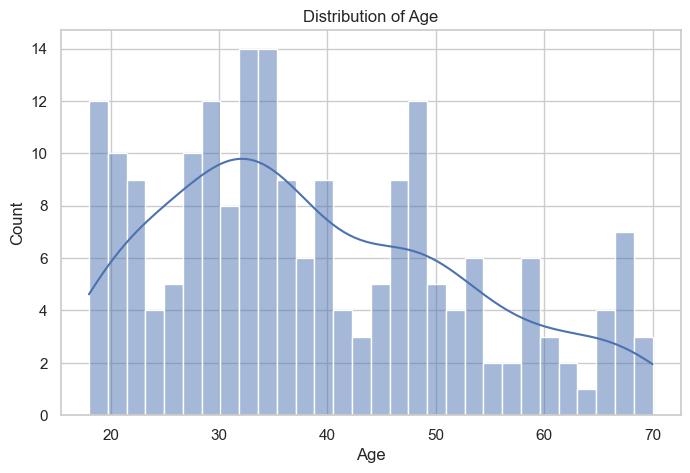

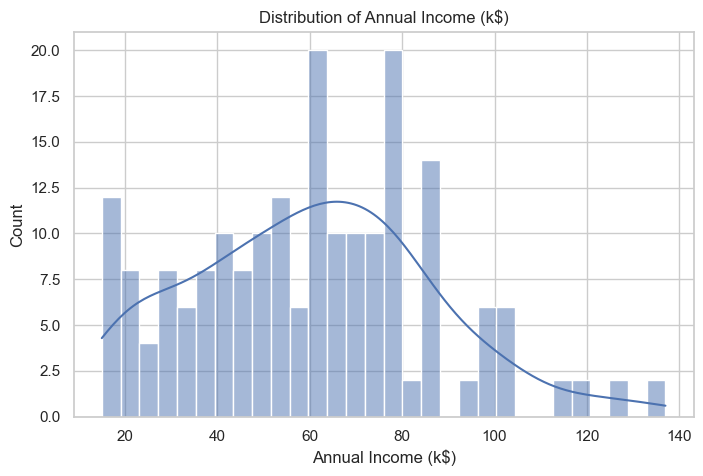

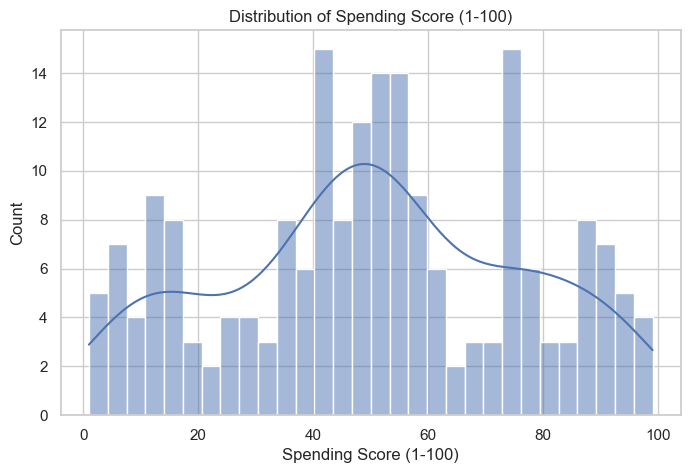

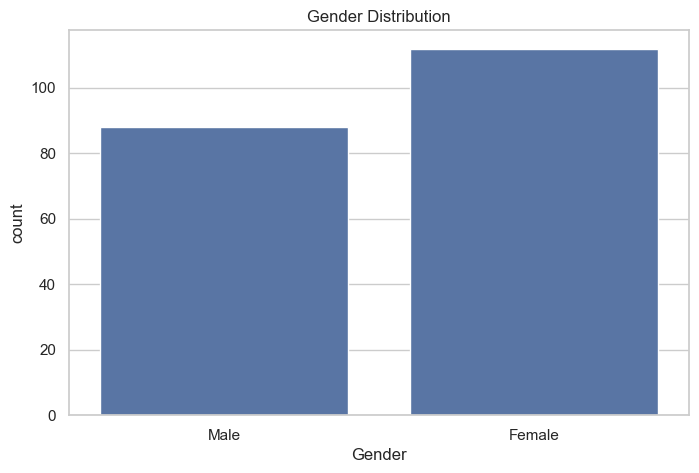

In [6]:
# Code: Univariate plots
numeric_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Histograms for numeric columns
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.show()

# Gender distribution
plt.figure()
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()


## EDA: Bivariate Analysis
- Scatter plots and pairwise relationships between Annual Income and Spending Score

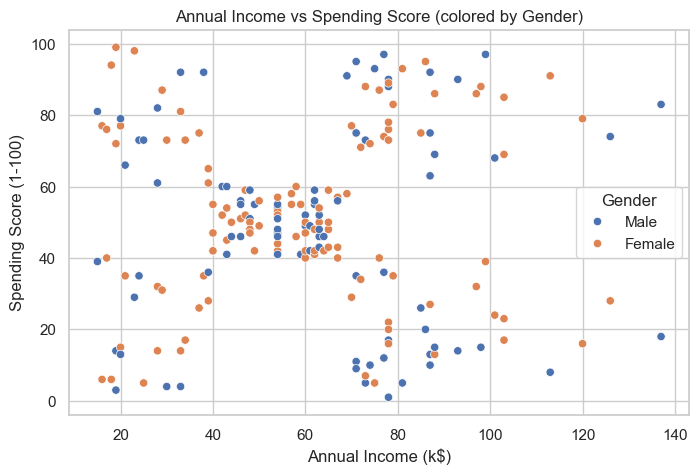

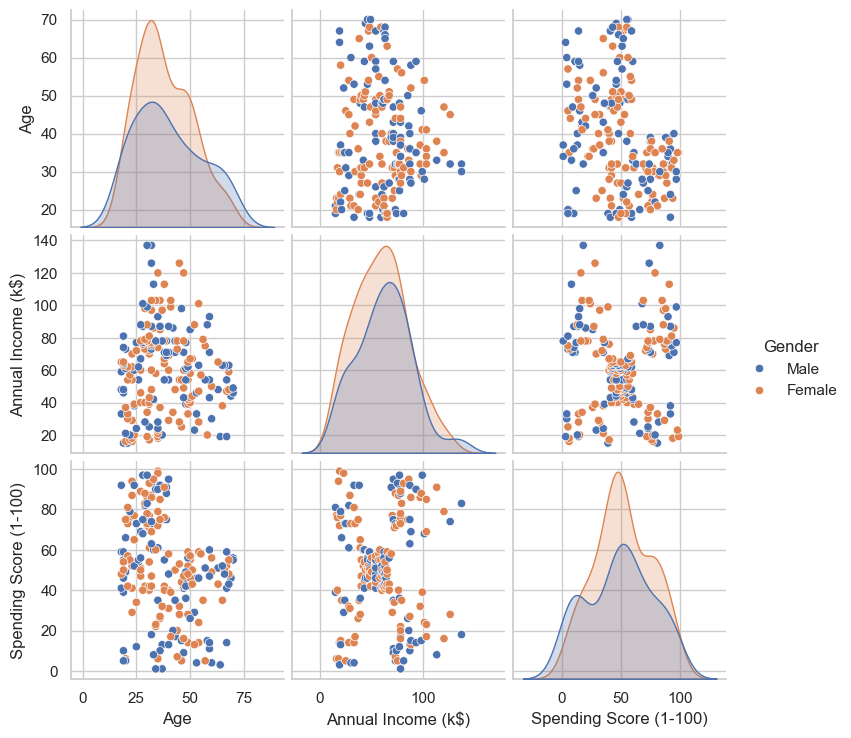

In [7]:
# Code: Bivariate plots
plt.figure()
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df)
plt.title("Annual Income vs Spending Score (colored by Gender)")
plt.show()

# Pairplot using selected columns
sns.pairplot(df[numeric_cols + ["Gender"]], hue="Gender", diag_kind="kde")
plt.show()

## Preprocessing for Clustering
- Select relevant features for segmentation (Age, Annual Income, Spending Score)
- Scale features using StandardScaler


In [8]:
# Code: Feature selection and scaling
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

X = df[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for convenience
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Determine Optimal Number of Clusters
- Use Elbow method (inertia) and Silhouette score to find a suitable K for K-Means

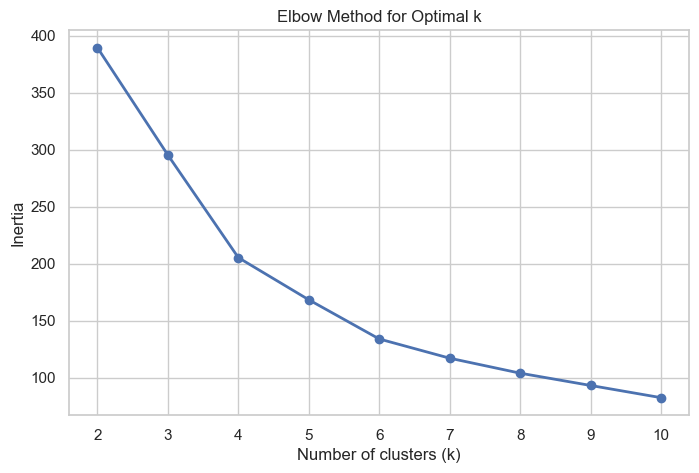

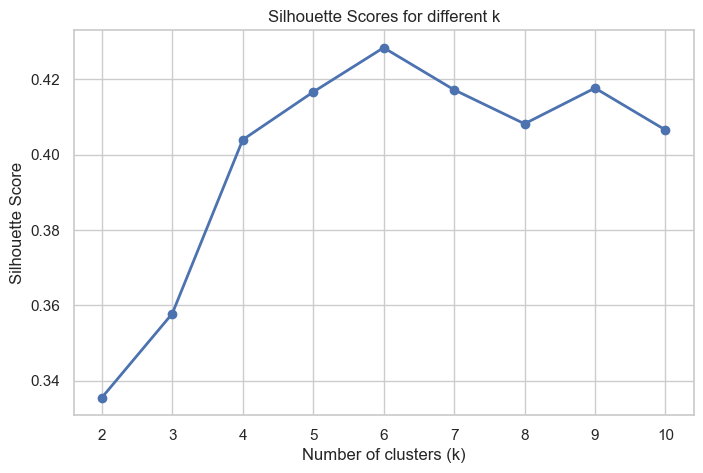

Silhouette scores: {2: np.float64(0.335), 3: np.float64(0.358), 4: np.float64(0.404), 5: np.float64(0.417), 6: np.float64(0.428), 7: np.float64(0.417), 8: np.float64(0.408), 9: np.float64(0.418), 10: np.float64(0.407)}


In [9]:
# Code: Elbow method and silhouette scores
inertia = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled_df)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled_df, labels))

# Plot Inertia (Elbow)
plt.figure()
plt.plot(K_range, inertia, 'o-', linewidth=2)
plt.xticks(K_range)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Plot Silhouette
plt.figure()
plt.plot(K_range, sil_scores, 'o-', linewidth=2)
plt.xticks(K_range)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for different k")
plt.show()

print("Silhouette scores:", dict(zip(K_range, np.round(sil_scores, 3))))

## Fit K-Means with chosen K

In [10]:
from sklearn.cluster import KMeans

# Define and fit KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Show cluster centers
kmeans.cluster_centers_

array([[44.89473684, 48.70526316, 42.63157895],
       [32.69230769, 86.53846154, 82.12820513],
       [24.82142857, 28.71428571, 74.25      ],
       [40.39473684, 87.        , 18.63157895]])

### Visualizing Clusters with PCA
We use PCA to reduce the features into 2D space for visualization.

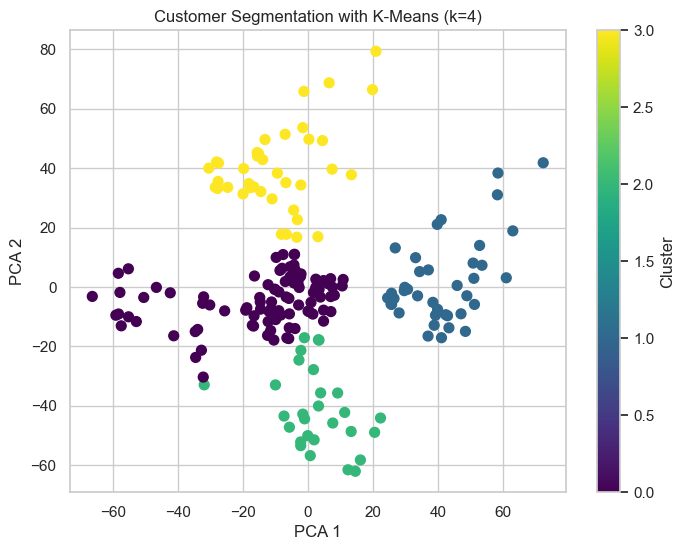

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='viridis', s=50)
plt.title("Customer Segmentation with K-Means (k=4)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

### Cluster Profiling
Let’s examine the average age, income, and spending score of each cluster.

In [12]:
cluster_profile = df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
cluster_profile

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,44.894737,48.705263,42.631579
1,32.692308,86.538462,82.128205
2,24.821429,28.714286,74.250000
3,40.394737,87.000000,18.631579


### Insights and Marketing Strategies

**Cluster 0: High Income, High Spending**
- Characteristics: Young to middle-aged, high income, very high spending score.  
- Strategy: Premium product lines, exclusive memberships, loyalty rewards.  

**Cluster 1: Low Income, Low Spending**
- Characteristics: Lower income, conservative spending.  
- Strategy: Budget deals, discounts, value-for-money bundles.  

**Cluster 2: Average Income, Moderate Spending**
- Characteristics: Mid-income, average spending score.  
- Strategy: Upsell with promotions, encourage cross-category shopping.  

**Cluster 3: High Income, Low Spending**
- Characteristics: High income but restrained spending.  
- Strategy: Personalized marketing, aspirational campaigns to unlock potential spending.